In [174]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [175]:
Titanic=pandas.read_csv('titanic.csv')
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [176]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [177]:
Titanic['Cabin'].fillna('Unknown',inplace=True)
mean_age=Titanic['Age'].mean()
Titanic['Age'].fillna(mean_age,inplace=True)
Titanic.isnull().sum()

/tmp/ipykernel_2772/3705579389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Cabin'].fillna('Unknown',inplace=True)
/tmp/ipykernel_2772/3705579389.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [178]:
Titanic['Survived'].replace({
    0:'Not survived',
    1:'Survived'
},inplace=True)
Titanic.groupby('Survived').size()

/tmp/ipykernel_2772/343363539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Survived'].replace({


Survived
Not survived    549
Survived        342
dtype: int64

In [179]:
Titanic['Pclass'].replace({
    1:'First Class',
    2:'Second Class',
    3:'Third Class'
},inplace=True)
Titanic.groupby('Pclass').size()

/tmp/ipykernel_2772/2041307806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Pclass'].replace({


Pclass
First Class     216
Second Class    184
Third Class     491
dtype: int64

In [180]:
Titanic['Embarked'].replace({
    'C':'Cherbourg',
    'Q':'Queenstorm',
    'S':'Southermpton'
},inplace=True)
Titanic.groupby('Embarked').size()

/tmp/ipykernel_2772/3351464691.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Embarked'].replace({


Embarked
Cherbourg       168
Queenstorm       77
Southermpton    644
dtype: int64

In [181]:
surivived_people=Titanic[Titanic['Survived']=='Survived']['Sex']

Titanic.groupby(surivived_people).size()


Sex
female    233
male      109
dtype: int64

In [182]:
Titanic.groupby('Pclass')['Survived'].size()

Pclass
First Class     216
Second Class    184
Third Class     491
Name: Survived, dtype: int64

In [183]:
Titanic['Age'].mean()

29.69911764705882

In [184]:
Titanic['Fare'].mean()

32.204207968574636

In [188]:
Titanic['Sex'].replace({
    'male':0,
    'female':1
},inplace=True)
surivived_people=Titanic[Titanic['Survived']=='Survived']['Sex'].mean()
survived_no_people=Titanic[Titanic['Survived']=='Not survived']['Sex'].mean()

t_stat,p_value=stats.ttest_ind(a=surivived_people,b=survived_no_people)

if p_value<0.05:
    print('There is a significant impact on the survival rate of passengers on the Titanic')
else:
     print('There is no significant impact on the survival rate of passengers on the Titanic')

There is no significant impact on the survival rate of passengers on the Titanic


In [191]:
# Did the passenger class (Pclass) have a statistically significant influence on the likelihood of surviving the Titanic disaster?
Titanic.groupby(['Pclass','Survived'])['Sex'].size()

Pclass        Survived    
First Class   Not survived     80
              Survived        136
Second Class  Not survived     97
              Survived         87
Third Class   Not survived    372
              Survived        119
Name: Sex, dtype: int64

<Axes: xlabel='Age', ylabel='Sex'>

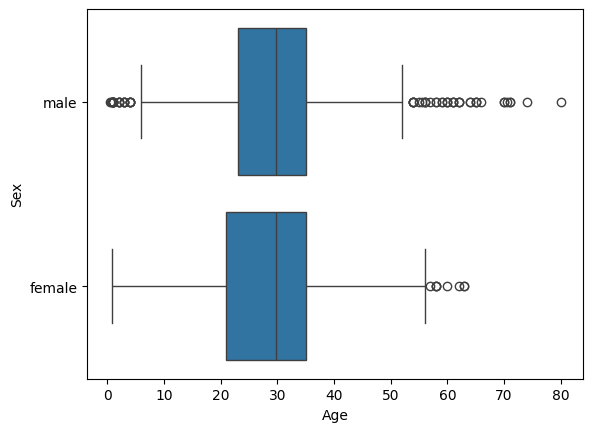

In [ ]:
sns.boxplot(x='Age',y='Sex',data=Titanic)

<Axes: xlabel='Survived', ylabel='count'>

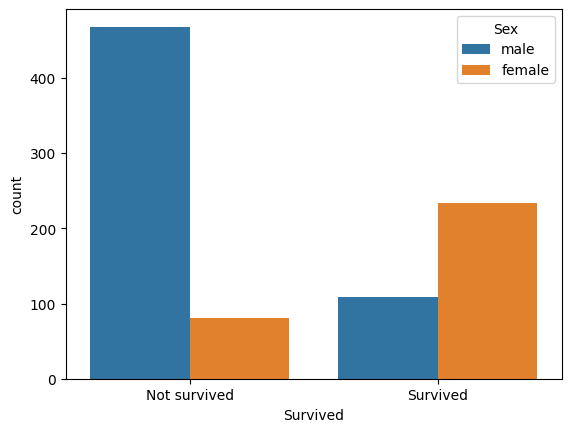

In [ ]:
sns.countplot(x='Survived',data=Titanic,hue='Sex')